# Phân tích Dataset Garbage Classification
## 1. Giới thiệu tổng quan
Notebook này thực hiện các thao tác phân tích cơ bản cho dataset phân loại rác thải. Chúng ta sẽ khám phá:
- Cấu trúc thư mục
- Phân bố các lớp
- Thống kê hình ảnh
- Hiển thị mẫu dữ liệu

In [5]:
# Import các thư viện cần thiết
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np

## 2. Khám phá cấu trúc dataset
Phân tích cấu trúc thư mục và đếm số lượng mẫu trong từng lớp

In [11]:
dataset_path = r'D:\Desktop\tap tanh hoc code\.vscode\AIL\Waste-Classification\garbage-dataset'
classes = os.listdir(dataset_path)
class_counts = {}
image_formats = {}
image_sizes = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        class_counts[cls] = len(images)
        
        # Lấy thông tin định dạng ảnh
        for img_file in images:  # Kiểm tra 100 ảnh đầu tiên mỗi lớp
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    fmt = img.format
                    image_formats[fmt] = image_formats.get(fmt, 0) + 1
                    image_sizes.append(img.size)
            except Exception as e:
                print(f"Lỗi khi mở ảnh {img_path}: {e}")

## 3. Phân bố các lớp
Hiển thị số lượng mẫu trong từng lớp dạng biểu đồ

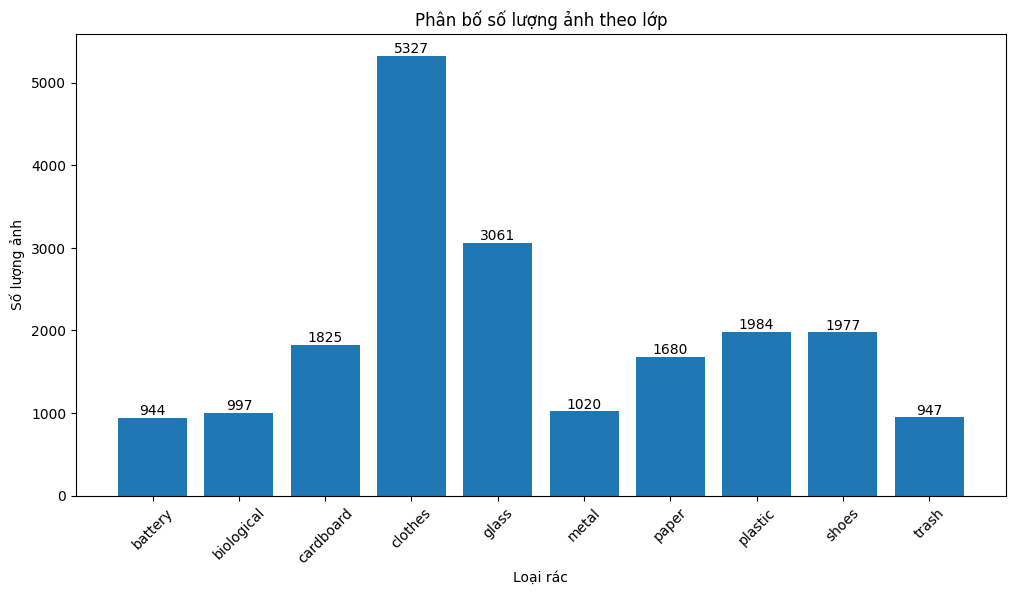

In [12]:
# Vẽ biểu đồ phân phối lớp
plt.figure(figsize=(12,6))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.title('Phân bố số lượng ảnh theo lớp')
plt.xlabel('Loại rác')
plt.ylabel('Số lượng ảnh')
plt.xticks(rotation=45)

# Thêm số liệu lên các cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()

## 4. Thống kê định dạng ảnh
Kiểm tra các định dạng file ảnh tồn tại trong dataset


Thống kê định dạng ảnh:
- JPEG: 19006 ảnh
- PNG: 747 ảnh
- MPO: 6 ảnh
- WEBP: 3 ảnh

Tổng số kích thước unique: 2731
Danh sách kích thước unique:
- (306, 304)
- (479, 412)
- (1001, 1620)
- (474, 971)
- (277, 277)
- (1200, 1600)
- (150, 322)
- (276, 318)
- (400, 613)
- (315, 160)
- (630, 401)
- (2968, 2984)
- (580, 580)
- (600, 787)
- (452, 394)
- (310, 310)
- (336, 448)
- (154, 328)
- (400, 469)
- (382, 600)
- (900, 1200)
- (474, 683)
- (550, 413)
- (200, 300)
- (334, 151)
- (280, 180)
- (320, 216)
- (390, 540)
- (69, 225)
- (257, 196)
- (141, 250)
- (599, 799)
- (1588, 1987)
- (654, 1000)
- (209, 241)
- (600, 800)
- (685, 1024)
- (2160, 2149)
- (1000, 770)
- (800, 416)
- (298, 169)
- (289, 349)
- (800, 1090)
- (275, 451)
- (400, 711)
- (475, 247)
- (400, 482)
- (352, 405)
- (4000, 3000)
- (370, 459)
- (475, 512)
- (248, 204)
- (428, 400)
- (474, 287)
- (302, 998)
- (231, 300)
- (250, 250)
- (405, 273)
- (264, 297)
- (350, 337)
- (474, 781)
- (548, 730)
- (662, 752)
- (2000, 1500)
- (

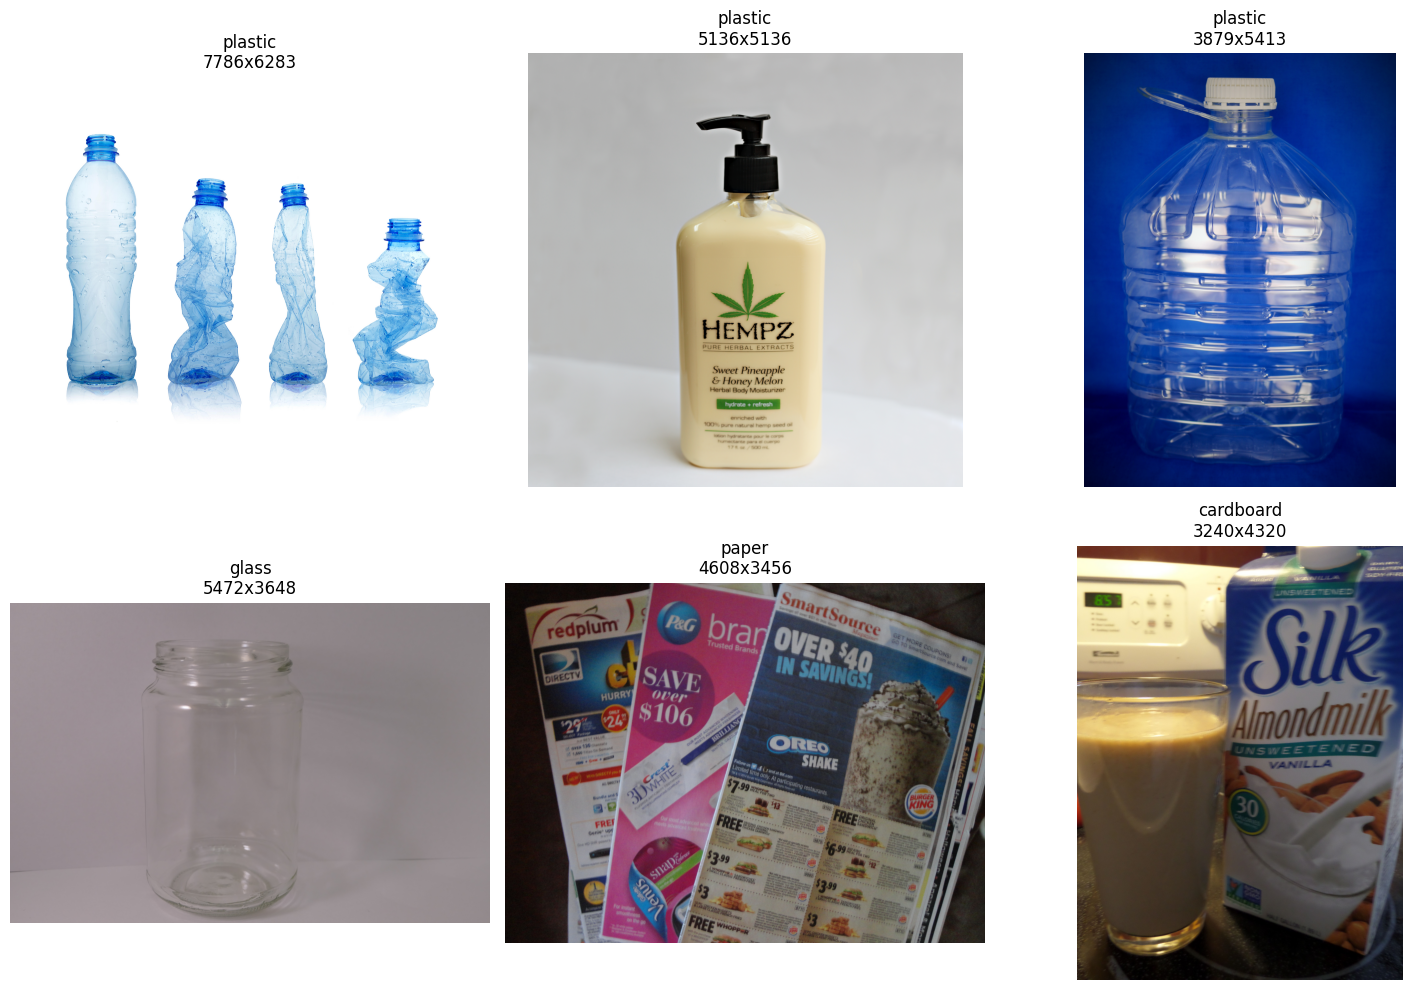

In [17]:
# Hiển thị phân bố định dạng ảnh
print("\nThống kê định dạng ảnh:")
for fmt, count in image_formats.items():
    print(f"- {fmt}: {count} ảnh")

# Lấy tất cả các kích thước unique
unique_sizes = set(image_sizes)
print(f"\nTổng số kích thước unique: {len(unique_sizes)}")
print("Danh sách kích thước unique:")
for size in unique_sizes:
    print(f"- {size}")
    # Hiển thị ảnh mẫu với các kích thước khác nhau
# Sắp xếp các kích thước unique theo diện tích giảm dần
sorted_sizes = sorted(unique_sizes, key=lambda x: x[0] * x[1], reverse=True)

plt.figure(figsize=(15, 10))
for i, size in enumerate(sorted_sizes[:6]):  # Hiển thị 6 kích thước lớn nhất
    for cls in classes:
        class_path = os.path.join(dataset_path, cls)
        images = os.listdir(class_path)
        for img_file in images:
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    if img.size == size:
                        plt.subplot(2, 3, i + 1)
                        plt.imshow(img)
                        plt.title(f"{cls}\n{size[0]}x{size[1]}")
                        plt.axis('off')
                        break
            except Exception as e:
                continue
        else:
            continue
        break

plt.tight_layout()
plt.show()

## 5. Hiển thị mẫu ảnh
Xem trước một số ảnh đại diện từ các lớp

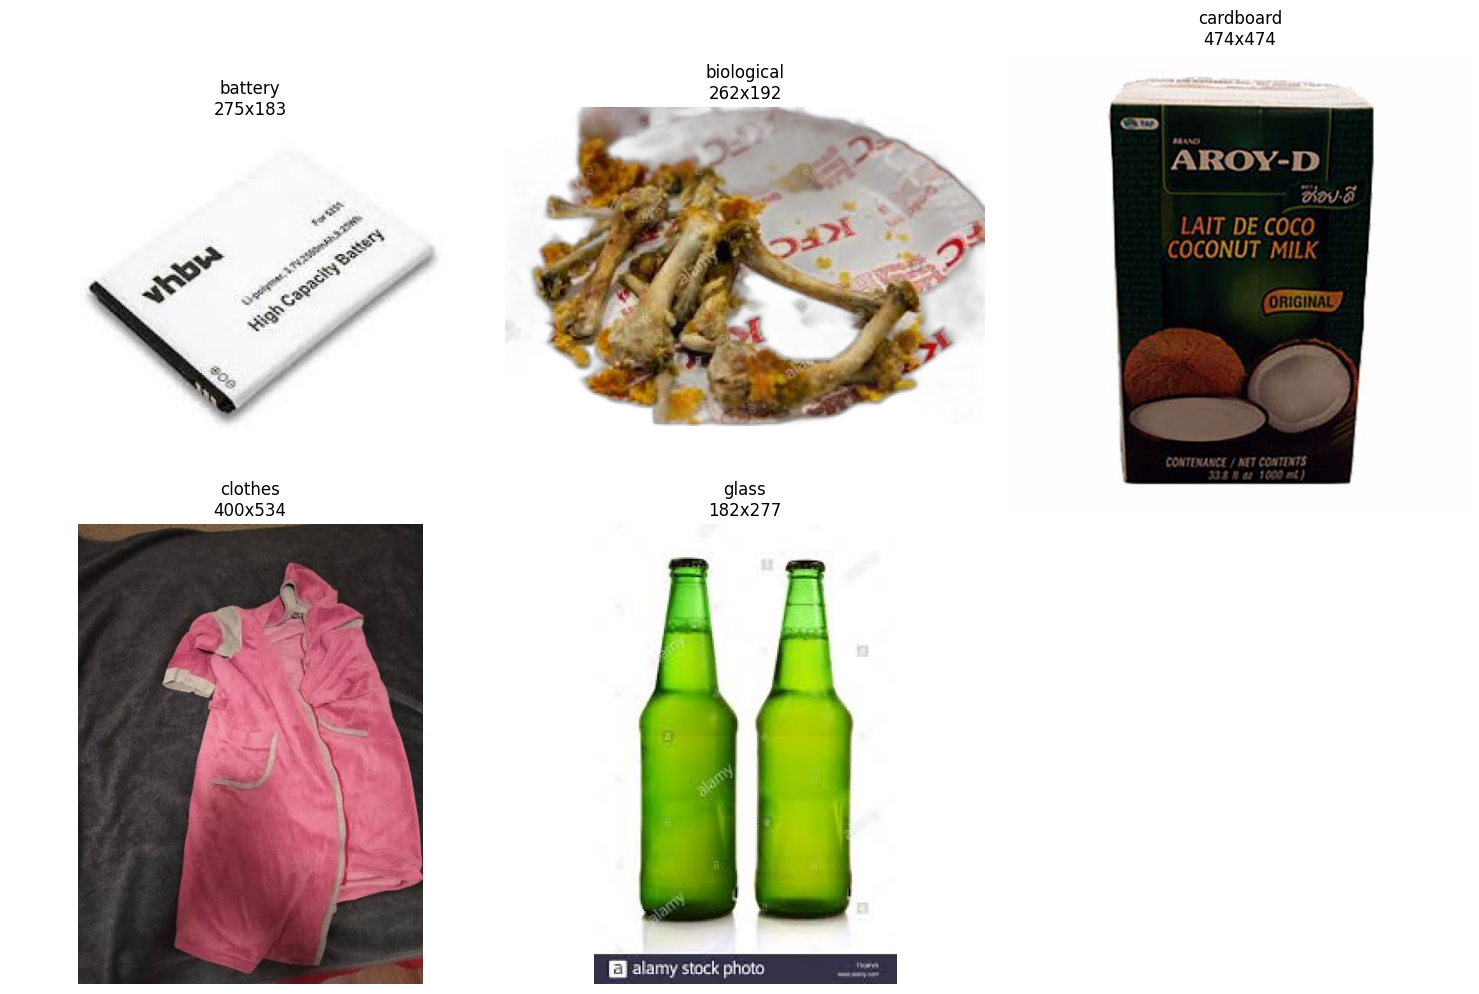

In [ ]:
# Hiển thị ảnh mẫu
plt.figure(figsize=(15,10))
for i, cls in enumerate(classes):  # Hiển thị 5 lớp đầu
    sample_image = os.listdir(os.path.join(dataset_path, cls))[0]
    img_path = os.path.join(dataset_path, cls, sample_image)
    
    plt.subplot(2,3,i+1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"{cls}\n{img.size[0]}x{img.size[1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 6. Phân tích chi tiết
Tạo bảng thống kê tổng hợp

In [10]:
# Tạo DataFrame chứa thông tin thống kê
stats_df = pd.DataFrame({
    'Lớp': list(class_counts.keys()),
    'Số lượng': list(class_counts.values()),
    'Tỷ lệ (%)': [count/sum(class_counts.values())*100 for count in class_counts.values()]
})

print("\nBảng thống kê tổng hợp:")
display(stats_df.style.background_gradient(cmap='Blues'))


Bảng thống kê tổng hợp:


,Lớp,Số lượng,Tỷ lệ (%)
0,battery,944,4.776844
1,biological,997,5.045036
2,cardboard,1825,9.234895
3,clothes,5327,26.955774
4,glass,3061,15.489323
5,metal,1020,5.161421
6,paper,1680,8.501164
7,plastic,1984,10.039470
8,shoes,1977,10.004048
9,trash,947,4.792025


In [12]:
import utils


In [ ]:
image_path = r'D:\Desktop\tap tanh hoc code\.vscode\AIL\Waste-Classification\garbage-dataset\plastic\plastic_20241210_161251.jpg'
folder_path = r'D:\Desktop\tap tanh hoc code\.vscode\AIL\Waste-Classification\garbage-dataset\trash'

display_image(folder_path = folder_path)